In [25]:
import pandas as pd

### Pandas Scatter Plot
Not only can Pandas handle your data, it can also help with visualizations. Let's run through some examples of [scatter plots](https://dataindependent.com/pandas/pandas-scatter-plot/). We will be using the [San Francisco Tree Dataset](https://data.sfgov.org/City-Infrastructure/Street-Tree-List/tkzw-k3nq). To download the data, click "Export" in the top right, and download the plain CSV.

Examples:
1. Default Scatter plot
2. Scatter Plot with specific size
3. Scatter plot with specific size and color
4. Extra customized scatter plot using the general DataFrame.plot() parameters

First, let's import our data

In [26]:
df = pd.read_csv("../data/Street_Tree_List.csv", parse_dates=['PlantDate']) # Importing our data, reading plant date as dates

# Feature Engineering
df['PlantYears'] = (pd.to_datetime('today') - df['PlantDate']) / pd.Timedelta(days=365) # Years since planting
df['qSpecies'] = df['qSpecies'].apply(lambda x: x.split(" ")[0]) # Extracting the parent species

df = df[['Latitude', 'Longitude', 'PlantYears', 'qSpecies']] # Taking a subset of columns
df.dropna(subset=['PlantYears', 'Latitude'], inplace=True) # Dropping NA values.
df.head()

,Latitude,Longitude,PlantYears,qSpecies
2666,37.776997,-122.424778,38.669693,Ficus
2670,37.743793,-122.417006,4.362844,Magnolia
2677,37.778292,-122.424868,38.677912,Ficus
2681,37.744335,-122.438662,3.635952,Tristaniopsis
2684,37.749705,-122.432618,4.485452,Eriobotrya


### 1. Default Scatter plot
Let's start off by creating a regular scatter plot. Due to this dataset, I'll need to specify the bounds of the Y Axis as well. I'm using the Latitude and Longitude of each tree in SF as it's scatter points. This will show *where* in SF these trees are located.

The chart doesn't really look like much does it? However we can start to see the outline of San Francisco. Note: I had to set ylim ("Y Limit") in order to remove some outliers.

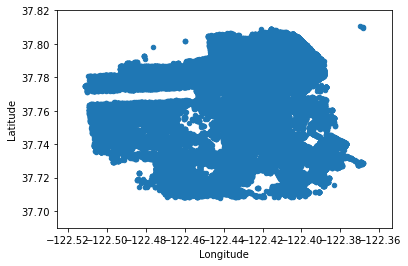

In [27]:
df.plot.scatter(x='Longitude',
                y='Latitude',
               ylim=(37.69, 37.82));

### 2. Scatter Plot with specific size
Next up is to change the size of our points on our scatter plot. I first want to make them all the same size, but smaller. I'll do this by passing a scaler (single value) into the "s=" parameter.

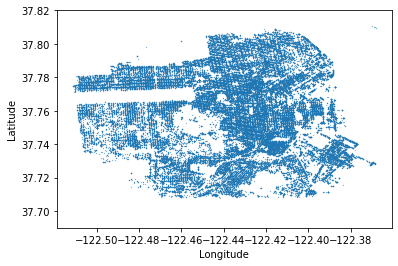

In [28]:
df.plot.scatter(x='Longitude',
                y='Latitude',
               ylim=(37.69, 37.82),
               s=.05);

It's cool to see some of the streets start to come out with the smaller points!

Now let's say I wanted to make the points bigger or smaller, relative to each trees age. In order to do this, I'll start with a bit of feature engineering to extract the trees age in years.

Note: I'm also zooming in (by adjusting the x/y limits) to see the size differences better.

Check out the size differences now. The older treets are bigger.

Notice how I'm squaring the sizes, and dividing by 10. This is to help transform the values within 'PlantYears' into values that will make the data look good.

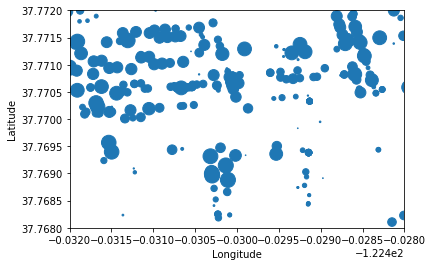

In [29]:
df.plot.scatter(x='Longitude',
                y='Latitude',
               ylim=(37.768, 37.772),
               xlim=(-122.432, -122.428),
               s=(df['PlantYears']**2)/10);

### 3. Scatter plot with specific size and color
Now let's deal with some color. I want to color code each tree species in my dataset. In order to do this I need to generate a specific color for each tree depending on what species it is.

I wish pandas was a bit more forgiving when generating colors for labels, but oh well.

To do this I'm going to:
1. Import matpotlib & numpy and get a colormap (list of color values)
2. Create a Series (from a dictionary) corresponding each tree species with a random color (using a random state so you can copy)
3. Merging that series back onto the larger dataframe so I have a color value for each tree species.

In [30]:
# Step 1. Import Matpliblib and get a color map
import matplotlib
import numpy as np
np.random.seed(seed=30)

cmap = matplotlib.cm.get_cmap('Spectral') # Getting a list of color values.

In [31]:
# Step 2. Create a Pandas series (needed to merge) from a dictionary
# Passing a number betwen 0-1 into cmap will return a color to me
color_dict = pd.Series({k:cmap(np.random.rand()) for k in df['qSpecies'].unique()})

# Naming my series so I can merge it below. Only named series can be merged
color_dict.name = 'color_dict'

In [32]:
# Step 3. Merge your two datasets
df = pd.merge(df, color_dict, how='left', left_on='qSpecies', right_index=True)

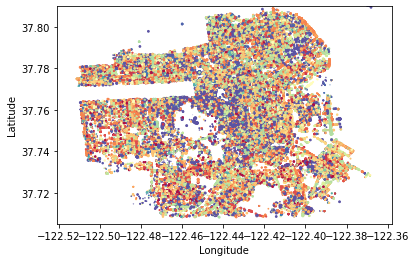

In [33]:
df.plot.scatter(x='Longitude',
                y='Latitude',
               ylim=(37.705, 37.81),
               s=(df['PlantYears'])/10,
               c=df['color_dict']);

Sweet! Check out how each tree species in our dataset is now a different color. It's cool to see how different neighborhoods have different densities of tree species.

### 4. Extra customized scatter plot using the general DataFrame.plot() parameters
Now lets go crazy and make our chart exactly how we want it. To do this I'll use a lot of other parameters from the general Pandas Plot function

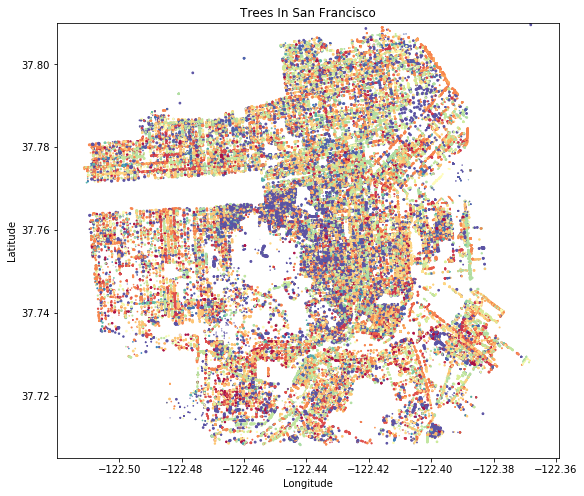

In [34]:
df.plot.scatter(x='Longitude',
                y='Latitude',
                ylim=(37.705, 37.81),
                s=(df['PlantYears'])/10,
                c=df['color_dict'],
                figsize=(9,8), # Setting the size of the plot
                title="Trees In San Francisco", # Setting the title
                xlabel='Longitude', # Labeling X Axis
                ylabel='Latitude'); # Labeling Y Axis